In [19]:
# loading modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# loading dhe data
Brain = pd.read_csv("Birds includes whole brain data 14 07 2023 .csv")
# Brain = Brain.drop(['Unnamed: 0'], axis=1)
Brain.head(85)

,Animal,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Namaqua dove,0.240,0.0870,0.555,"14,167,000","59,533,000","94,490,000",31.850
2,Common ground dove,0.246,0.0750,0.572,"17,602,000","51,380,000","89,630,000",35.277
3,Diamond dove,0.240,0.0776,0.545,"18,209,000","54,101,000","87,879,000",39.930
4,King quail,0.220,0.0717,0.521,"20,523,000","42,945,000","80,478,000",43.810
...,...,...,...,...,...,...,...,...
80,Monk parakeet,2.240,0.2810,3.420,"396,000,000","195,000,000","696,765,000",81.700
81,Peregrine falcon,3.787,1.0620,6.776,"396,060,000","548,548,000","1,060,000,000",672.800
82,Black vulture,5.930,1.3985,9.967,"398,899,000","512,097,000","1,009,000,000",1747.000
83,Azure-winged magpie,2.218,0.2710,3.393,"399,695,000","243,490,000","740,589,000",84.110


In [21]:
# Dropping NaN values
Brain = Brain.dropna().reset_index(drop=True)

In [22]:
# Converting into float and removing commas
if Brain['Forebrain n'].dtype != 'float64':
     Brain['Forebrain n'] = Brain['Forebrain n'].str.replace(',', '').astype(float)
if Brain['Cerebellum n'].dtype != 'float64':
     Brain['Cerebellum n'] = Brain['Cerebellum n'].str.replace(',', '').astype(float)
if Brain['Whole brain n'].dtype != 'float64':
     Brain['Whole brain n'] = Brain['Whole brain n'].str.replace(',', '').astype(float)

In [23]:
Brain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Animal         110 non-null    object 
 1   Forebrain m    110 non-null    float64
 2   Cerebellum m   110 non-null    float64
 3   Whole brain m  110 non-null    float64
 4   Forebrain n    110 non-null    float64
 5   Cerebellum n   110 non-null    float64
 6   Whole brain n  110 non-null    float64
 7   Body m         110 non-null    float64
dtypes: float64(7), object(1)
memory usage: 7.0+ KB


In [24]:
# Getting relative cortical and cerebellar masses and relative number of neurons in each structure
Brain['Forebrain m r %'] = Brain['Forebrain m']/Brain['Whole brain m']*100
Brain['Cerebellum m r %'] = Brain['Cerebellum m']/Brain['Whole brain m']*100
Brain['Forebrain n r %'] = Brain['Forebrain n']/Brain['Whole brain n']*100
Brain['Cerebellum n r %'] = Brain['Cerebellum n']/Brain['Whole brain n']*100

In [25]:
# Getting neuron densities in a miligram of structure
Brain['Forebrain n d'] = Brain['Forebrain n']/(Brain['Forebrain m']*1000)
Brain['Cerebellum n d'] = Brain['Cerebellum n']/(Brain['Cerebellum m']*1000)
Brain['Whole brain n d'] = Brain['Whole brain n']/(Brain['Whole brain m']*1000)

In [26]:
# Number of neurons per body mass
Brain['Forebrain n per body m'] = Brain['Forebrain n']/Brain['Body m']
Brain['Cerebellum n per body m'] = Brain['Cerebellum n']/Brain['Body m']
Brain['Whole brain n per body m'] = Brain['Whole brain n']/Brain['Body m']

In [27]:
Breng = Brain
Breng.head()

,Animal,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m,Forebrain m r %,Cerebellum m r %,Forebrain n r %,Cerebellum n r %,Forebrain n d,Cerebellum n d,Whole brain n d,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m
0,Namaqua dove,0.240,0.0870,0.555,14167000.0,59533000.0,94490000.0,31.850,43.243243,15.675676,14.993121,63.004551,59029.166667,684287.356322,170252.252252,444803.767661,1.869168e+06,2.966719e+06
1,Common ground dove,0.246,0.0750,0.572,17602000.0,51380000.0,89630000.0,35.277,43.006993,13.111888,19.638514,57.324557,71552.845528,685066.666667,156695.804196,498965.331519,1.456473e+06,2.540749e+06
2,Diamond dove,0.240,0.0776,0.545,18209000.0,54101000.0,87879000.0,39.930,44.036697,14.238532,20.720536,61.563058,75870.833333,697177.835052,161245.871560,456023.040321,1.354896e+06,2.200826e+06
3,King quail,0.220,0.0717,0.521,20523000.0,42945000.0,80478000.0,43.810,42.226488,13.761996,25.501379,53.362410,93286.363636,598953.974895,154468.330134,468454.690710,9.802556e+05,1.836978e+06
4,Common quail,0.360,0.1090,0.787,22568000.0,75198000.0,117760000.0,94.860,45.743329,13.850064,19.164402,63.856997,62688.888889,689889.908257,149631.512071,237908.496732,7.927261e+05,1.241408e+06


In [28]:
Breng.describe()

,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m,Forebrain m r %,Cerebellum m r %,Forebrain n r %,Cerebellum n r %,Forebrain n d,Cerebellum n d,Whole brain n d,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m
count,110.000000,110.000000,110.000000,1.100000e+02,1.100000e+02,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,1.100000e+02,110.000000,1.100000e+02,1.100000e+02,1.100000e+02
mean,3.557691,0.666899,5.759718,3.189665e+08,2.922348e+08,6.905940e+08,2601.683545,57.590427,12.020205,38.218619,48.776870,97123.678048,5.541703e+05,142173.419206,1.186260e+06,1.020551e+06,2.577148e+06
std,3.852669,0.745945,5.784788,3.752325e+08,2.012968e+08,5.753056e+08,12298.823675,8.824361,2.774180,15.772048,14.307112,63166.520518,2.198083e+05,62050.833780,1.759332e+06,1.476740e+06,3.775590e+06
min,0.176000,0.040000,0.357000,1.416700e+07,4.294500e+07,8.047800e+07,5.600000,42.226488,6.005789,14.993121,17.521696,18741.594996,1.826565e+05,40473.055231,3.993419e+03,8.826089e+03,1.356935e+04
25%,1.064000,0.238950,1.957000,7.306950e+07,1.349340e+08,2.820318e+08,164.190000,49.496757,9.843060,25.545220,39.030673,50226.405405,4.042487e+05,97408.521147,1.143920e+05,2.615935e+05,4.937258e+05
50%,2.253000,0.469800,3.862500,1.549625e+08,2.321540e+08,4.826050e+08,459.033500,58.310245,12.849825,35.154081,51.685447,75485.283096,5.180430e+05,132664.834600,2.948621e+05,5.186645e+05,1.015399e+06
75%,4.206250,0.849725,7.343500,3.994960e+08,4.111295e+08,9.572640e+08,1025.825000,63.396266,14.030734,47.538337,60.447717,133857.739159,6.494055e+05,174995.927301,1.778499e+06,1.311652e+06,3.423526e+06
max,25.580000,5.800900,40.249000,1.916000e+09,1.059572e+09,3.136000e+09,120050.000000,76.332637,17.506389,76.491228,72.386671,363636.363636,1.650000e+06,459030.812325,1.142857e+07,1.178571e+07,2.926321e+07


In [29]:
Breng.shape

(110, 18)

In [ ]:
# pd.set_option('display.max_rows', 170)
# Breng.head(170)

In [30]:
X00 = Breng['Forebrain m']
Y00 = Breng["Forebrain n"]

In [31]:
# The correlation between Forebrain mass and number of neurons
r0 = np.corrcoef(X00, Y00)
r0

array([[1.        , 0.66379538],
       [0.66379538, 1.        ]])

In [32]:
X01 = Breng['Cerebellum m']
Y01 = Breng["Cerebellum n"]

In [33]:
# The same for cerebellum
r1 = np.corrcoef(X01, Y01)
r1

array([[1.        , 0.83897337],
       [0.83897337, 1.        ]])

In [34]:
X02 = Breng['Forebrain m r %']
Y02 = Breng["Forebrain n r %"]

In [35]:
# The correlation between relative cortical mass and relative number of neurons
r2 = np.corrcoef(X02, Y02)
r2

array([[1.        , 0.89103308],
       [0.89103308, 1.        ]])

In [36]:
X03 = Breng['Cerebellum m r %']
Y03 = Breng["Cerebellum n r %"]

In [37]:
# Same as above for cerebellum
r3 = np.corrcoef(X03, Y03)
r3

array([[1.        , 0.88202685],
       [0.88202685, 1.        ]])

In [38]:
Y04 = Breng["Body m"]

In [39]:
# Correlation between body mass and number of neurons in the cortex
r4 = np.corrcoef(Y00, Y04)
r4

array([[1.       , 0.0580945],
       [0.0580945, 1.       ]])

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

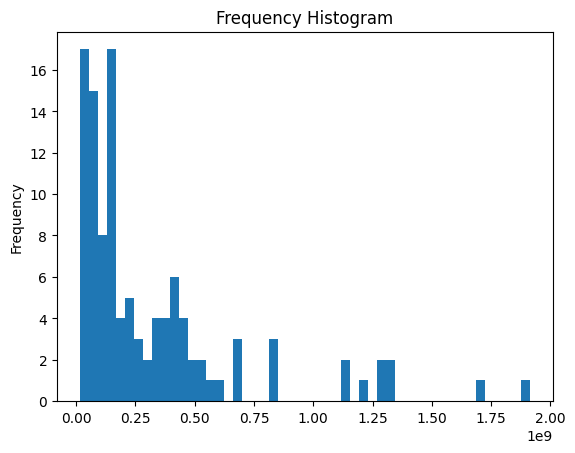

In [40]:
plt.hist(Y00, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

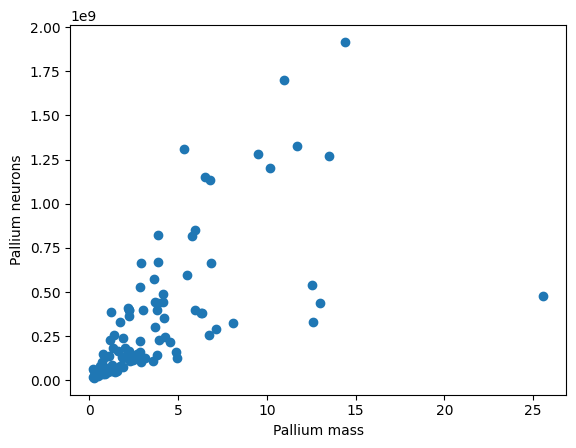

In [42]:
plt.scatter(X00, Y00)
plt.xlabel('Pallium mass')
plt.ylabel('Pallium neurons')
plt.show()

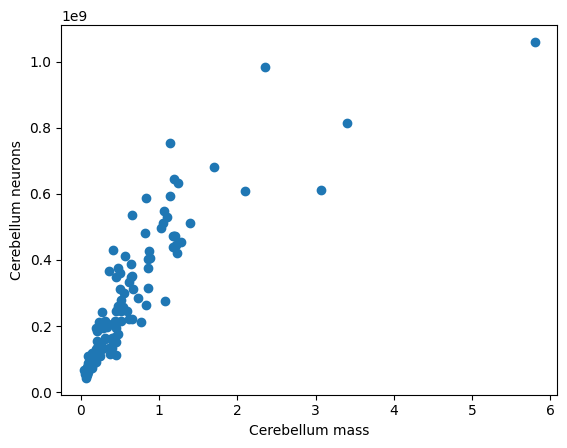

In [43]:
plt.scatter(X01, Y01)
plt.xlabel('Cerebellum mass')
plt.ylabel('Cerebellum neurons')
plt.show()

In [41]:
# Saving modified data
Breng.to_csv('/content/birds with feature engineering 14 07 2023 .csv')